In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/train.csv', nrows=50000, usecols=['Keyword_ID', 'Match_type_ID', 'Revenue', 'Clicks'])

In [2]:
data.head()

,Date,Keyword_ID,Ad_group_ID,Campaign_ID,Account_ID,Device_ID,Match_type_ID,Revenue,Clicks,Conversions
0,2014-12-14,88883763407,1042143654876,71672332180,861287123742,298643508640,95725474456,0.0,2,0
1,2014-12-14,837336088038,1038839743255,685307833020,654870334100,298643508640,95725474456,0.0,2,0
2,2014-12-14,220115136780,691864063258,551279817203,212779990172,848779586902,95725474456,0.0,2,0
3,2014-12-14,423389776473,1044670215658,551279817203,212779990172,848779586902,95725474456,0.0,5,0
4,2014-12-14,546746671314,355072204358,919168440848,212779990172,298643508640,95725474456,0.0,2,0


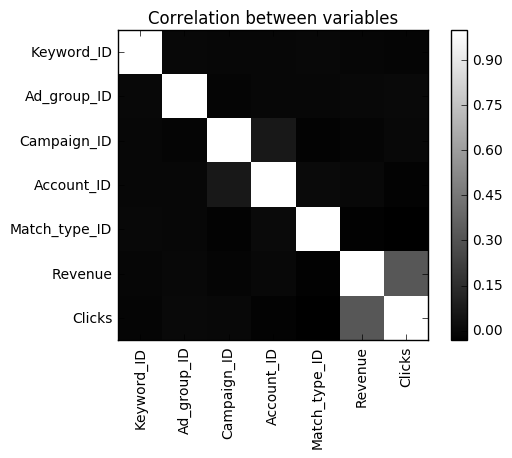

In [85]:
input_cols=['Keyword_ID', 'Ad_group_ID', 'Campaign_ID', 'Account_ID', 'Match_type_ID', 'Revenue', 'Clicks']
cor_mat = data[input_cols].corr()
plt.imshow(cor_mat, cmap='gray', interpolation='nearest')
plt.xticks(range(len(input_cols)),input_cols,rotation='vertical')
plt.yticks(range(len(input_cols)),input_cols)
plt.colorbar()
plt.title('Correlation between variables')
plt.show()

In [86]:
cor_mat

,Keyword_ID,Ad_group_ID,Campaign_ID,Account_ID,Match_type_ID,Revenue,Clicks
Keyword_ID,1.000000,0.001031,-0.003141,-0.000845,0.001653,-0.006184,-0.007572
Ad_group_ID,0.001031,1.000000,-0.009558,-0.001932,-0.000629,0.004216,0.007449
Campaign_ID,-0.003141,-0.009558,1.000000,0.066178,-0.018656,-0.009483,0.004660
Account_ID,-0.000845,-0.001932,0.066178,1.000000,0.011738,0.003667,-0.017225
Match_type_ID,0.001653,-0.000629,-0.018656,0.011738,1.000000,-0.021505,-0.031581
Revenue,-0.006184,0.004216,-0.009483,0.003667,-0.021505,1.000000,0.322770
Clicks,-0.007572,0.007449,0.004660,-0.017225,-0.031581,0.322770,1.000000


In [2]:
data_first_rows = data.head(n=50000)


In [ ]:
df_numeric = pd.get_dummies(data_first_rows, columns=['Keyword_ID', 'Match_type_ID'], sparse=True)

data_first_rows.shape

In [7]:
from sklearn.linear_model import LinearRegression

y = pd.DataFrame()

y['Revenue_per_Click'] = data_first_rows['Revenue'] / data_first_rows['Clicks']

y.shape

(50000, 1)

In [78]:
X_numeric = pd.get_dummies(data_first_rows, cols_to_transform)

ValueError: Length of 'prefix' (5) did not match the length of the columns being encoded (1).

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np

 
X_train, X_test, y_train, y_test = train_test_split(df_numeric, y, test_size=0.33, random_state=42)

regression_model = linear_model.LinearRegression()
regression_model.fit(X_train, y_train)
prediction = regression_model.predict(X_test)
print(np.mean((prediction - y_test) ** 2))


MemoryError: 